In [7]:
3.
import numpy as np

def softmax(x, axis=-1):
    x = x - np.max(x, axis=axis, keepdims=True)
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=axis, keepdims=True)

def scaled_dot_product_attention(Q, K, V):
    d_k = Q.shape[-1]
    scores = np.matmul(Q, K.T) / np.sqrt(d_k)
    attention_weights = softmax(scores, axis=-1)
    output = np.matmul(attention_weights, V)
    return output, attention_weights


In [8]:
4.
def masked_scaled_dot_product_attention(Q, K, V):
    d_k = Q.shape[-1]
    seq_len = Q.shape[0]

    scores = np.matmul(Q, K.T) / np.sqrt(d_k)
    mask = np.triu(np.ones((seq_len, seq_len)), k=1)
    scores = scores - 1e9 * mask

    attention_weights = softmax(scores, axis=-1)
    output = np.matmul(attention_weights, V)

    return output, attention_weights

# Demonstration that masking works
np.set_printoptions(precision=3, suppress=True)

Q = np.random.rand(4, 3)
K = np.random.rand(4, 3)
V = np.random.rand(4, 3)

_, attn = masked_scaled_dot_product_attention(Q, K, V)
print(attn)


[[1.    0.    0.    0.   ]
 [0.436 0.564 0.    0.   ]
 [0.325 0.398 0.277 0.   ]
 [0.22  0.323 0.253 0.205]]


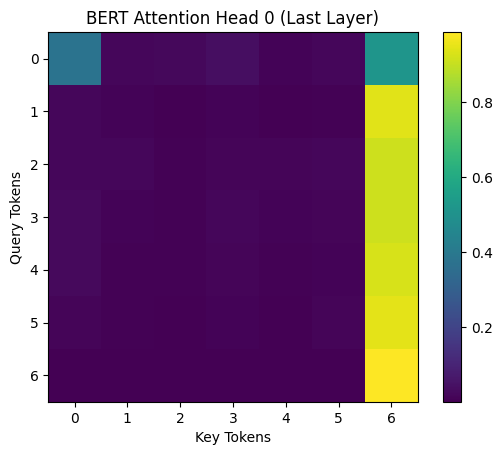

In [6]:
5.
import torch
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained(
    "bert-base-uncased",
    output_attentions=True
)

sentence = "Attention helps models understand context"
inputs = tokenizer(sentence, return_tensors="pt")

#Forward pass
with torch.no_grad():
    outputs = model(**inputs)

# shape: (batch, heads, seq_len, seq_len)
attentions = outputs.attentions[-1][0]

# Plot attention head 0
plt.imshow(attentions[0], cmap="viridis")
plt.colorbar()
plt.title("BERT Attention Head 0 (Last Layer)")
plt.xlabel("Key Tokens")
plt.ylabel("Query Tokens")
plt.show()
